In [1]:
# general packages
import numpy as np
import pandas as pd
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# color palette object
colpal = {
    'NMP':'#00afff',
    'Mesoderm':'#20c505',
    'Early_Neural':'#db00ff',
    'Neural':'#ff00a7',
    'p3':'#ffab02',
    'V3':'#ffd966',
    'pMN':'#ff0000',
    'MN':'#ff8080',
    'FP':'#a52a2a',
}

In [2]:
import dynamo as dyn

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


In [5]:
adata0 = sc.read_h5ad("../SVM23/data/celltyped_adata.h5ad")
adata0 = adata0[adata0.obs.cell_annotation!='other']

adata0

View of AnnData object with n_obs × n_vars = 44713 × 24967
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation'
    layers: 'new', 'old', 'total'

In [6]:
neural_types = ['Early_Neural','Neural','pMN','p3','FP','MN','V3']

neural = adata0[[ct in neural_types for ct in adata0.obs.cell_annotation]]

neural_genes = list(sc.read_h5ad('../SVM23/data/neural_data_0606.h5ad').var_names)


In [7]:
neural.obs['labelling_time'] = 2.0

dyn.pp.recipe_monocle(
    neural, 
    genes_to_use=neural_genes, 
    keep_filtered_genes=False,
    keep_filtered_cells=True,
    tkey='labelling_time'
)

dyn.tl.dynamics(neural)

|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> 
Dynamo detects your labeling data is from a one-shot experiment. If experiment type is not corrent, please correct 
this via supplying the correct experiment_type (one of `one-shot`, `kin`, `deg`) as needed.
|-----> detected experiment type: one-shot
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|---

2024-02-14 12:12:54.019023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 12:12:56.665284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-14 12:12:56.665327: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-14 12:13:11.683347: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [117.1166s]
|-----? Your adata only has labeling data, but `NTR_vel` is set to be `False`. Dynamo will reset it to `True` to enable this analysis.


estimating gamma: 100%|██████████| 1374/1374 [05:49<00:00,  3.93it/s]


AnnData object with n_obs × n_vars = 26533 × 1374
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation', 'labelling_time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    varm: 'alpha'
    layers

In [10]:
dyn.tl.reduceDimension(neural, basis='pca')
dyn.tl.cell_velocities(neural, basis='pca')

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [77.3906s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|

AnnData object with n_obs × n_vars = 26533 × 1374
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation', 'labelling_time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'gr

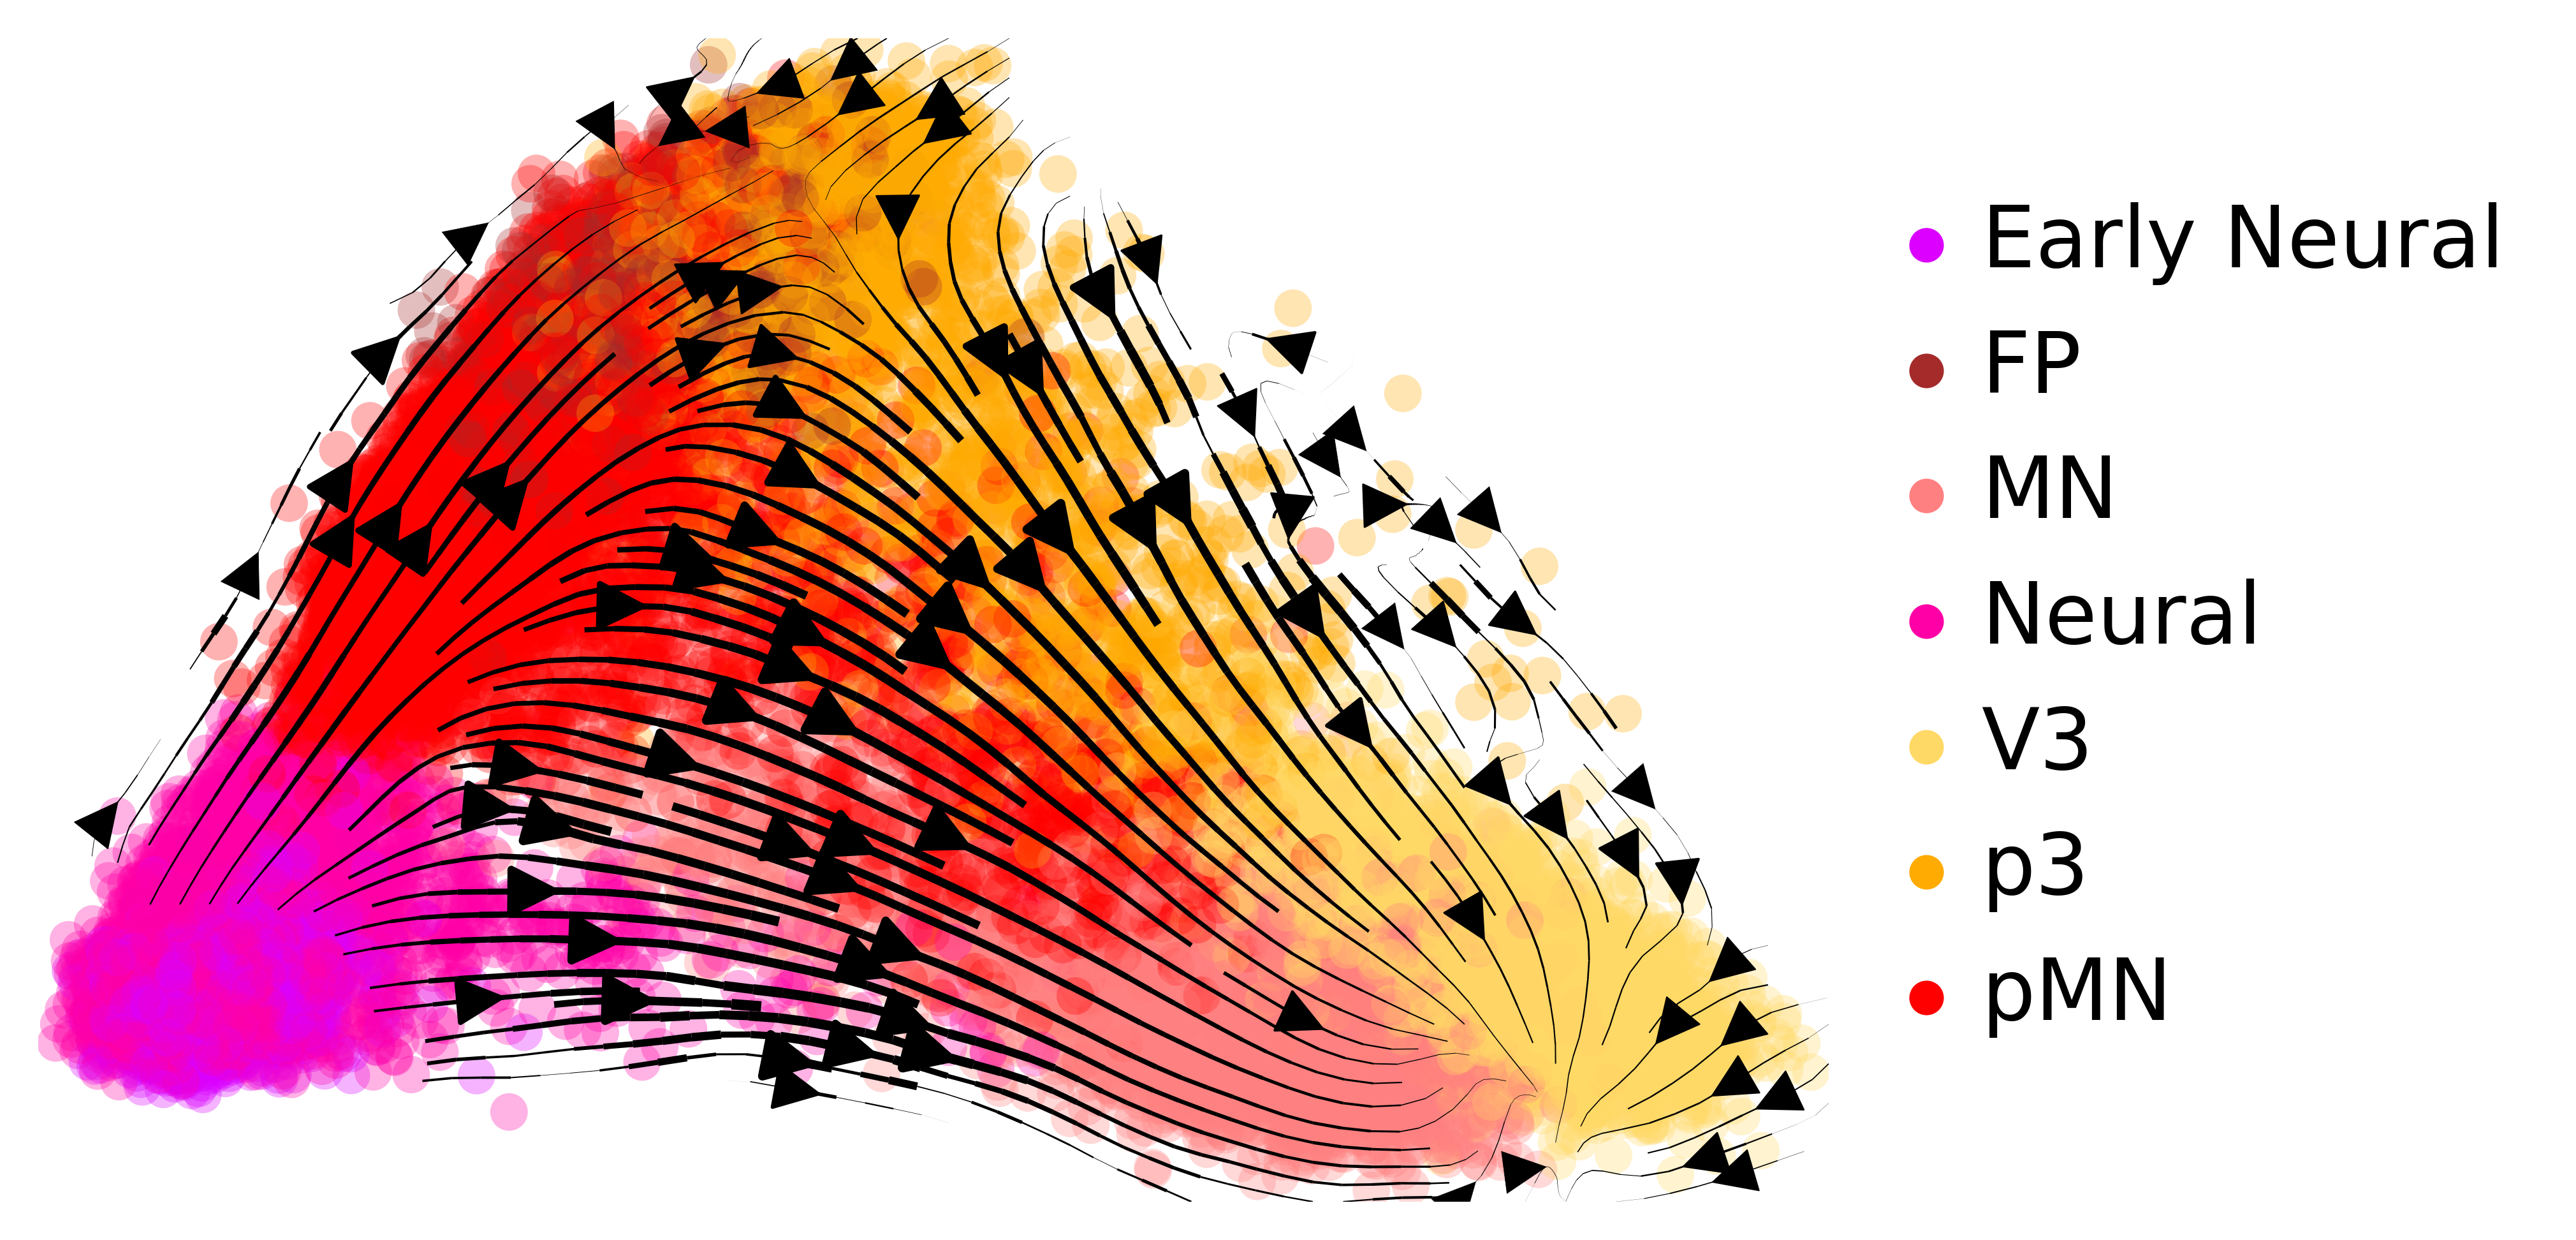

In [20]:
copy = neural.copy()

loc = False
fig = plt.figure(figsize=(6,4), dpi=300)
ax1 = fig.subplots()

neural.uns["velocity_params"] = {'embeddings':'pca'}
scv.pl.velocity_embedding_stream(
    copy, 
    basis='pca', 
    title=f"",
    color='cell_annotation', 
    show=False,
    ax=ax1,
    palette=colpal,
    arrow_size=2,
    legend_fontoutline=10,
    legend_loc='right margin',
    size=200,
    fontsize=16, 
    legend_fontsize=16, components=f'1,2'
)
plt.savefig('viz_dynamo1.png', transparent=True, bbox_inches='tight')
plt.show()

# nmp

In [17]:
nt_types = ['MN', 'V3', 'p3','FP']

nmp = adata0[[ct not in nt_types for ct in adata0.obs.cell_annotation]]
nmp = nmp[[tp not in ['D3','D6','D7','D8'] for tp in nmp.obs.timepoint]]

nmp_genes = list(sc.read_h5ad('../SVM23/data/nmp_data_1606.h5ad').var_names)

nmp.obs['labelling_time'] = 2.0

dyn.pp.recipe_monocle(
    nmp, 
    genes_to_use=nmp_genes, 
    keep_filtered_genes=False,
    keep_filtered_cells=True,
    tkey='labelling_time'
)

dyn.tl.dynamics(nmp)

|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> 
Dynamo detects your labeling data is from a one-shot experiment. If experiment type is not corrent, please correct 
this via supplying the correct experiment_type (one of `one-shot`, `kin`, `deg`) as needed.
|-----> detected experiment type: one-shot
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|---

estimating gamma: 100%|██████████| 1229/1229 [04:34<00:00,  4.48it/s]


AnnData object with n_obs × n_vars = 24262 × 1229
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation', 'labelling_time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    varm: 'alpha'
    layers

In [18]:
dyn.tl.reduceDimension(nmp, basis='pca')
dyn.tl.cell_velocities(nmp, basis='pca')

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [72.2485s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|

AnnData object with n_obs × n_vars = 24262 × 1229
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation', 'labelling_time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'gr

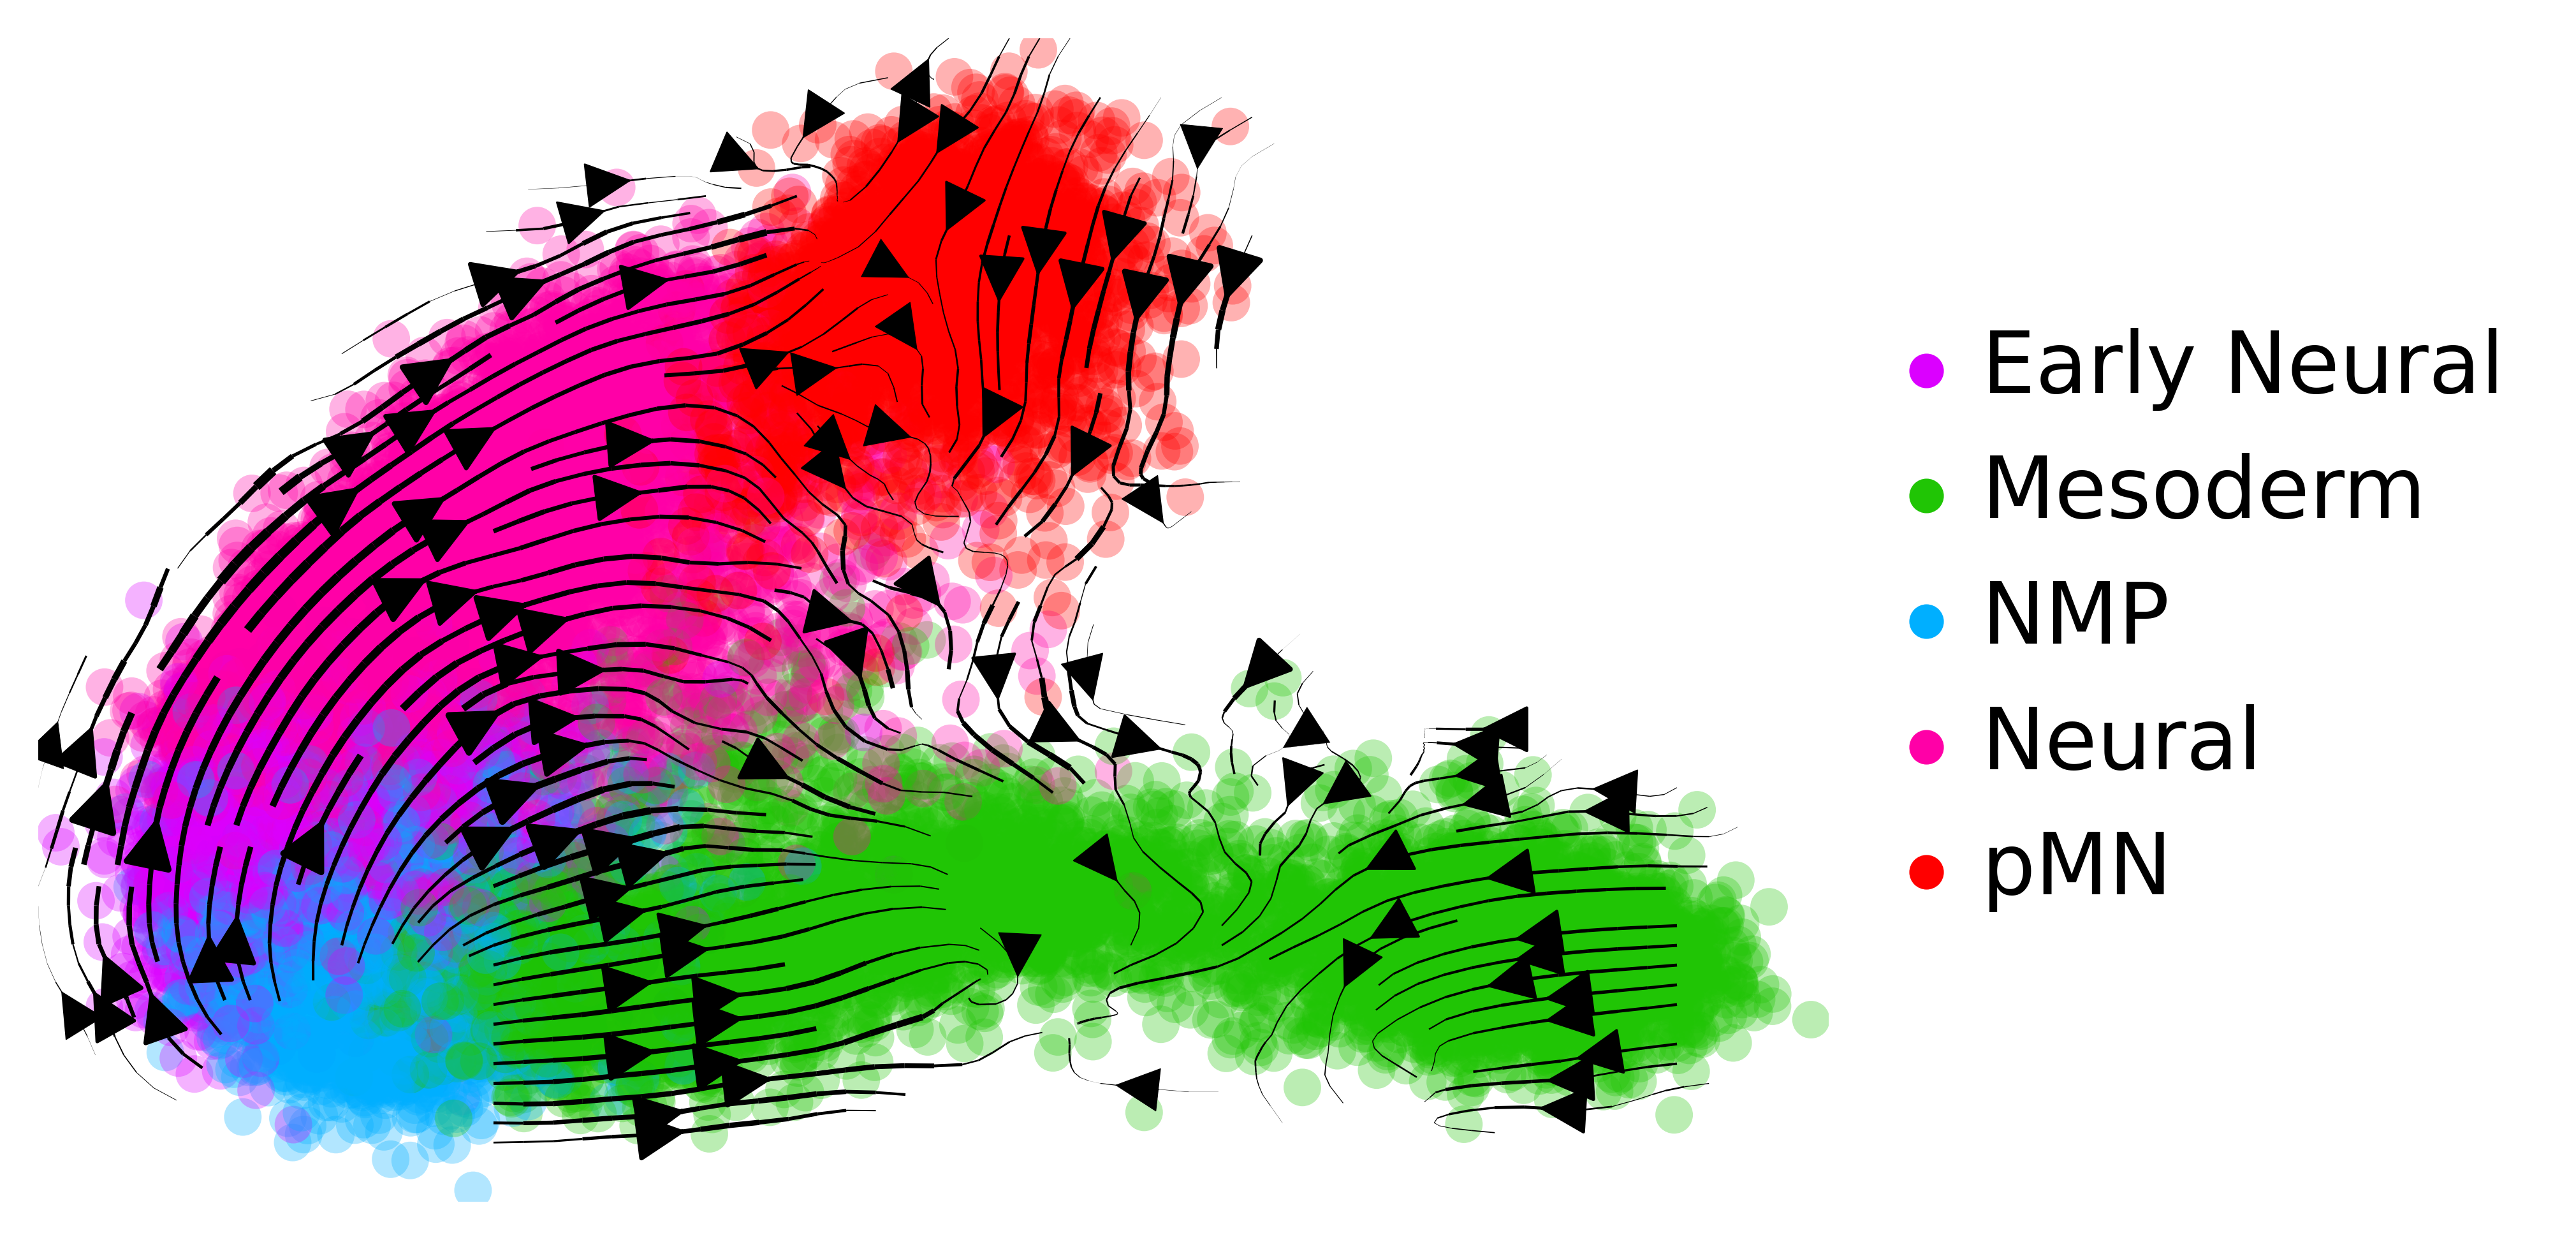

In [21]:
copy = nmp.copy()

loc = False
fig = plt.figure(figsize=(6,4), dpi=300)
ax1 = fig.subplots()

neural.uns["velocity_params"] = {'embeddings':'pca'}
scv.pl.velocity_embedding_stream(
    copy, 
    basis='pca', 
    title=f"",
    color='cell_annotation', 
    show=False,
    ax=ax1,
    palette=colpal,
    arrow_size=2,
    legend_fontoutline=10,
    legend_loc='right margin',
    size=200,
    fontsize=16, 
    legend_fontsize=16, components=f'1,2'
)
plt.savefig('viz_dynamo2.png', transparent=True, bbox_inches='tight')
plt.show()